In [1]:
from pathlib import Path
from IPython.display import HTML, display
css = Path("../../../css/rtl.css").read_text(encoding="utf-8")
display(HTML(f"<style>{css}</style>"))

# فصل ۱ — مقدمه‌ای بر یادگیری ماشین  
## درس ۸: یادگیری ماشین در برابر آمار، داده‌کاوی و هوش مصنوعی (مرزها و هم‌پوشانی‌ها)

**دوره:** دوره مقدماتی یادگیری ماشین  
**تعداد فصل/درس در سطح کل دوره:** ۳۷ فصل • چندین درس در هر فصل (این نوت‌بوک مربوط به *فصل ۱، درس ۸* است).

---

### چرا این درس مهم است؟

در عمل، تیم‌ها معمولاً نمی‌پرسند «ما داریم ML انجام می‌دهیم یا Statistics؟» بلکه می‌پرسند:

- *دقیقاً چه سؤال/مسئله‌ای را پاسخ می‌دهیم؟* (تبیین، پیش‌بینی، کشف الگو، یا تصمیم/اقدام)  
- *به چه نوع شواهدی نیاز داریم؟* (عدم‌قطعیت، اطمینان، ادعاهای علّی، پایداری/استحکام)  
- *چه قیود و محدودیت‌هایی داریم؟* (زمان پاسخ، تفسیرپذیری، حاکمیت/قانون‌مندی، هزینه، ایمنی)

این درس یک مدل ذهنی روشن ارائه می‌دهد تا بفهمید **یادگیری ماشین**، **آمار**، **داده‌کاوی** و **هوش مصنوعی** کجا هم‌پوشانی دارند و کجا متفاوت‌اند؛ تا ابزار درست را انتخاب کنید، نتایج را درست تفسیر کنید و با ذی‌نفعان دقیق صحبت کنید.


## اهداف یادگیری

در پایان این نوت‌بوک خواهید توانست:

1. **تعریف** عملی از ML، Statistics، Data Mining و AI ارائه کنید (بر اساس *هدف، ورودی، خروجی و ارزیابی*).  
2. **مرز اصلی** را توضیح دهید: **استنباط (Inference) در برابر پیش‌بینی (Prediction) در برابر کشف الگو (Discovery) در برابر تصمیم‌گیری/کنش (Decision/Action)**.  
3. **تشخیص** دهید چه زمانی روش‌ها قابل جایگزینی هستند (هم‌پوشانی) و چه زمانی نیستند (عدم تطابق هدف).  
4. چند مثال عملی اجرا کنید که هر چارچوب را ملموس می‌کند:
   - استنباط آماری (عدم‌قطعیت، آزمون فرض)
   - یادگیری پیش‌بینی‌محور (تعمیم و اعتبارسنجی)
   - داده‌کاوی (کشف الگوی بدون برچسب)
   - چارچوب AI (سیاست/Policy، هزینه‌ها و آستانه‌های تصمیم)
5. با یک چک‌لیست عملی، **رویکرد مناسب** را انتخاب کنید.

---

## نقشه راه

1. مجموعه‌ای از تعاریف کاربردی  
2. یک رده‌بندی «هدف → روش → ارزیابی»  
3. هم‌پوشانی‌ها و سوءبرداشت‌های رایج  
4. مثال‌های حل‌شده (با چند دیتاست)  
5. چک‌لیست تصمیم‌گیری و تمرین‌ها

## ۱) چهار حوزه، با تمرکز بر «هدف اصلی»

یک راه بسیار مفید برای تفکیک این حوزه‌ها، تمرکز بر *هدف اصلی* است (این‌که «موفقیت» دقیقاً یعنی چه):

### آمار (هدف اصلی: **استنباط تحت عدم‌قطعیت**)
آمار می‌پرسد: **از دادهٔ محدود، چه نتیجه‌ای دربارهٔ جهان می‌توان گرفت؟**  
خروجی‌های کلیدی شامل *برآورد*، *عدم‌قطعیت* و *تبیین* است:

- برآورد پارامترها (میانگین‌ها، اثرها، ضرایب رگرسیون)
- فاصله اطمینان و خطای استاندارد
- آزمون فرض و p-value (با ملاحظات لازم)
- کمیت‌های علّی (وقتی مفروضات اجازه دهند)

در آمار معمولاً **قابلیت شناسایی (Identifiability)**، **مفروضات** و **کمّی‌سازی عدم‌قطعیت** اهمیت مرکزی دارند.

### یادگیری ماشین (هدف اصلی: **پیش‌بینی و تعمیم**)
ML می‌پرسد: **آیا می‌توان تابعی مثل $f(x)$ ساخت که روی دادهٔ جدید خوب پیش‌بینی کند؟**  
موفقیت معمولاً با دادهٔ کنارگذاشته‌شده (Hold-out) یا اعتبارسنجی متقاطع سنجیده می‌شود؛ با معیارهایی مانند Accuracy، RMSE، AUC، Log Loss و غیره.

ML می‌تواند برای استنباط هم استفاده شود، اما ذهنیت پیش‌فرض آن غالباً این است:
- بهینه‌سازی عملکرد پیش‌بینی
- مدیریت Bias–Variance و جلوگیری از Overfitting
- ارزیابی تجربی تعمیم‌پذیری

### داده‌کاوی (هدف اصلی: **کشف الگو و خلاصه‌سازی**)
داده‌کاوی می‌پرسد: **چه ساختار، گروه‌بندی، ارتباط یا ناهنجاری در داده وجود دارد؟**  
اغلب ماهیت اکتشافی دارد و با یادگیری بدون‌ناظر هم‌پوشانی جدی دارد:

- خوشه‌بندی و بخش‌بندی
- قوانین انجمنی (Market Basket)
- الگوهای پرتکرار
- کشف ناهنجاری/Outlier
- پروفایل‌سازی توصیفی

خروجی معمولاً **بینش قابل اقدام** یا **فرضیهٔ کاندید** است، نه یک ادعای علّی قطعی.

### هوش مصنوعی (هدف اصلی: **رفتار هدف‌محور / تصمیم و اقدام**)
AI می‌پرسد: **یک عامل (Agent) چگونه باید عمل کند تا اهداف را تحت قیود برآورده کند؟**  
به‌صورت کلاسیک شامل برنامه‌ریزی، استدلال، جست‌وجو، و در کاربردهای مدرن، سامانه‌های تصمیم‌ساز مبتنی بر یادگیری است. ML اغلب یک *جزء* از AI است، اما AI اضافه می‌کند:

- سیاست تصمیم: $\pi(s) \rightarrow a$
- مبادلهٔ سود/هزینه (Utility/Cost)
- قیود و چک‌های ایمنی
- حلقهٔ تعامل با محیط (Feedback, Environment)

به‌بیان ساده: ML اغلب «پیش‌بینی» است، در حالی که AI «پیش‌بینی + تصمیم + اقدام» است.

---

## ۲) یک روش واحد می‌تواند در چند چارچوب قرار بگیرد

همان *الگوریتم* می‌تواند تحت «چارچوب‌های متفاوت» استفاده شود.

مثال: رگرسیون خطی
- **چارچوب آماری:** تفسیر ضرایب، عدم‌قطعیت، آزمون فرض.
- **چارچوب ML:** کمینه‌سازی خطا روی اعتبارسنجی، منظم‌سازی، تنظیم ابرپارامتر.
- **چارچوب داده‌کاوی:** خلاصه‌سازی داده و بررسی الگوهای باقیمانده (Residual).
- **چارچوب AI:** استفاده از پیش‌بینی‌ها برای انتخاب اقدام با هزینه و قیود.

پس مرزها معمولاً «نام ابزار» نیست؛ بلکه **سؤال، مفروضات و شیوهٔ ارزیابی** است.

## ۳) یک رده‌بندی کاربردی: هدف → روش‌های رایج → ارزیابی

| حوزه | هدف رایج | ورودی رایج | خروجی رایج | ارزیابی رایج |
|---|---|---|---|---|
| آمار | تبیین/استنباط اثرها؛ کمّی‌سازی عدم‌قطعیت | دادهٔ نمونه‌گیری‌شده؛ اغلب $n$ کوچک/متوسط؛ مفروضات صریح | برآوردها، CI، p-value، اندازه اثر | عیب‌یابی مدل، پوشش (coverage)، توان (power)، پایداری نسبت به مفروضات |
| یادگیری ماشین | پیش‌بینی خوب روی دادهٔ جدید (تعمیم) | اغلب $n$ بزرگ؛ بُعد بالا؛ ویژگی‌های مهندسی‌شده | مدل آموزش‌دیده $f(x)$؛ پیش‌بینی؛ گاهی احتمال | معیارهای Hold-out/CV؛ کالیبراسیون؛ استحکام؛ مانیتورینگ |
| داده‌کاوی | کشف ساختار؛ خلاصه‌سازی؛ تولید فرضیه | داده‌های بزرگ و ناهمگن | خوشه‌ها، قوانین، ناهنجاری‌ها، خلاصه‌ها | پایداری، تفسیرپذیری، سودمندی؛ گاهی معیارهای جانشین |
| هوش مصنوعی | انتخاب اقدام برای تحقق هدف تحت قیود | حالت/مشاهده، پاداش یا هزینه، قیود | سیاست $\pi$، برنامه‌ها، تصمیم‌ها | امیدریاضی سود/هزینه، regret، قیود ایمنی، KPIهای سرتاسری |

**هم‌پوشانی‌های کلیدی**
- ML و Statistics در مدل‌سازی هم‌پوشانی زیادی دارند (مثلاً رگرسیون و طبقه‌بندی).  
- Data Mining با ML بدون‌ناظر هم‌پوشانی دارد (خوشه‌بندی، کاهش‌بُعد).  
- AI با ML هم‌پوشانی دارد وقتی یادگیری برای هدایت تصمیم استفاده شود (مثلاً RL یا تنظیم آستانه).

**ریسک‌های کلیدی هنگام ترکیب چارچوب‌ها**
- تلقی الگوهای اکتشافی (داده‌کاوی) به‌عنوان شواهد تأییدی (آمار).  
- تفسیر علّیِ مدل‌های پیش‌بینی‌محور (ML) بدون مفروضات شناسایی.  
- بهینه‌سازی یک معیار پیش‌بینی (ML) در حالی‌که هزینهٔ تصمیم نادیده گرفته شده (AI).  
- انجام آزمون‌های آماری متعدد بدون کنترل خطای چندگانه (p-hacking) در کارهای اکتشافی.

در ادامه این تفاوت‌ها را با مثال‌های عملی روشن می‌کنیم.

In [2]:
# Core scientific Python stack
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Stats
from scipy import stats

# ML
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    mean_squared_error, r2_score, roc_auc_score, RocCurveDisplay
)
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

print("Environment ready.")

# RMSE helper (avoids deprecated 'squared' argument in mean_squared_error)
try:
    from sklearn.metrics import root_mean_squared_error
except Exception:
    def root_mean_squared_error(y_true, y_pred):
        return float(np.sqrt(mean_squared_error(y_true, y_pred)))


Environment ready.


In [3]:
from pathlib import Path
from io import StringIO

def read_csv_fallback(rel_path: str, fallback_csv: str, **kwargs) -> pd.DataFrame:
    """Read a CSV from the repo path; fall back to provided CSV text if the file is not available."""
    kwargs.setdefault("low_memory", False)

    p = Path(rel_path)
    if p.exists():
        return pd.read_csv(p, **kwargs)
    return pd.read_csv(StringIO(fallback_csv), **kwargs)

def bootstrap_tabular(df: pd.DataFrame, n: int, noise_scale: float = 0.05) -> pd.DataFrame:
    """Create a larger synthetic dataset by sampling rows with replacement and adding small noise to numeric columns."""
    out = df.sample(n=n, replace=True, random_state=RANDOM_SEED).reset_index(drop=True)
    num_cols = out.select_dtypes(include=[np.number]).columns
    for c in num_cols:
        col = out[c].astype(float)
        # noise proportional to std (fallback to 1.0 if std=0)
        std = float(col.std()) if float(col.std()) > 0 else 1.0
        out[c] = col + np.random.normal(0, noise_scale * std, size=len(out))
    return out

# --- Fallback CSV snippets (top rows) ---
diabetes_csv = """Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,classification
6,148,72,35,0,33.6,0.627,50,Diabetic
1,85,66,29,0,26.6,0.351,31,Non-Diabetic
8,183,64,0,0,23.3,0.672,32,Diabetic
1,89,66,23,94,28.1,0.167,21,Non-Diabetic
0,137,40,35,168,43.1,2.288,33,Diabetic
"""

diamonds_csv = """id,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58,334,4.2,4.23,2.63
5,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
"""

airports_csv = """id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,icao_code,iata_code,gps_code,local_code,home_link,wikipedia_link,keywords
6523,00A,heliport,Total RF Heliport,40.070985,-74.933689,11,NA,US,US-PA,Bensalem,no,,,,K00A,00A,https://www.penndot.pa.gov/TravelInPA/airports-pa/Pages/Total-RF-Heliport.aspx,,
323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435,NA,US,US-KS,Leoti,no,,,,00AA,00AA,,,
6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450,NA,US,US-AK,Anchor Point,no,,,,00AK,00AK,,,
6525,00AL,small_airport,Epps Airpark,34.8647994995,-86.7703018188,820,NA,US,US-AL,Harvest,no,,,,00AL,00AL,,,
506791,00AN,small_airport,Katmai Lodge Airport,59.093287,-156.456699,80,NA,US,US-AK,King Salmon,no,,,,00AN,00AN,,,
322127,00AS,small_airport,Fulton Airport,34.9428028,-97.8180194,1100,NA,US,US-OK,Alex,no,,,,00AS,00AS,,,
"""

complaints_csv = """Product Name,Sub Product,Issue,Sub Issue,Company,Complaint ID
Consumer Loan,Vehicle loan,Managing the loan or lease,,Wells Fargo & Company,468882
Bank account or service,Checking account,Using a debit or ATM card,,Wells Fargo & Company,468889
Bank account or service,Checking account,Account opening closing or management,,Santander Bank US,468879
Bank account or service,Checking account,Deposits and withdrawals,,Wells Fargo & Company,468949
Mortgage,Conventional fixed mortgage,Loan servicing payments escrow account,,Franklin Credit Management,475823
"""

# --- Load from repo paths (or fallback) ---
diabetes_path = "../../../Datasets/Classification/diabetes.csv"
diamonds_path = "../../../Datasets/Regression/diamonds.csv"
airports_path = "../../../Datasets/Clustering/airports.csv"
complaints_path = "../../../Datasets/Clustering/ConsumerComplaints.csv"

df_diabetes_small = read_csv_fallback(diabetes_path, diabetes_csv)
df_diamonds_small = read_csv_fallback(diamonds_path, diamonds_csv)
df_airports_small = read_csv_fallback(airports_path, airports_csv)
df_complaints_small = read_csv_fallback(complaints_path, complaints_csv)

print("Loaded (or mocked) datasets:")
print("- diabetes:", df_diabetes_small.shape)
print("- diamonds:", df_diamonds_small.shape)
print("- airports:", df_airports_small.shape)
print("- complaints:", df_complaints_small.shape)

display(df_diabetes_small.head())

Loaded (or mocked) datasets:
- diabetes: (768, 9)
- diamonds: (53940, 11)
- airports: (83125, 19)
- complaints: (65499, 18)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,classification
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non-Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non-Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


## ۴) مثال A — چارچوب آماری: استنباط همراه با عدم‌قطعیت

برای نمایش یک جریان کاری کلاسیک در آمار، از دیتاست **diabetes** استفاده می‌کنیم:

1. تعریف یک کمیت هدف (Estimand): اختلاف میانگین BMI بین دو کلاس  
2. کمّی‌سازی عدم‌قطعیت: فاصله اطمینان  
3. آزمون فرض صفر: $H_0: \mu_{\text{BMI, Diabetic}} - \mu_{\text{BMI, Non}} = 0$  
4. بررسی مفروضات و تفسیر محتاطانه

این یک مسئلهٔ *استنباطی* است. حتی اگر نتیجه «از نظر آماری معنادار» باشد، الزاماً به این معنا نیست که:

- اثر علّی است (ممکن است عوامل مخدوش‌کننده وجود داشته باشد)،
- اثر از نظر عملی بزرگ است (اندازه اثر مهم است)،
- نتیجه قابل تکرار است (مسائل داده، چندآزمونی و غیره).

برای اینکه مثال در هر محیطی قابل اجرا باشد، اگر فقط چند سطر نمونه در دسترس باشد، آن را **بوت‌استرپ** می‌کنیم تا یک دیتاست بزرگ‌ترِ مصنوعی بسازیم. وقتی این نوت‌بوک را داخل ریپو اجرا کنید، به‌صورت خودکار CSV واقعی از مسیر زیر خوانده می‌شود:

`../../../Datasets/Classification/diabetes.csv`

و می‌توانید بخش بوت‌استرپ را حذف یا تغییر دهید.

Counts: {'Diabetic': 268, 'Non-Diabetic': 500}
Mean BMI: {'Diabetic': 35.14253731343284, 'Non-Diabetic': 30.3042}
Welch t-test: t = 8.619, p = 6.566e-17
Estimated mean difference (Diabetic - Non): 4.838
95% CI for difference: [3.736, 5.941]


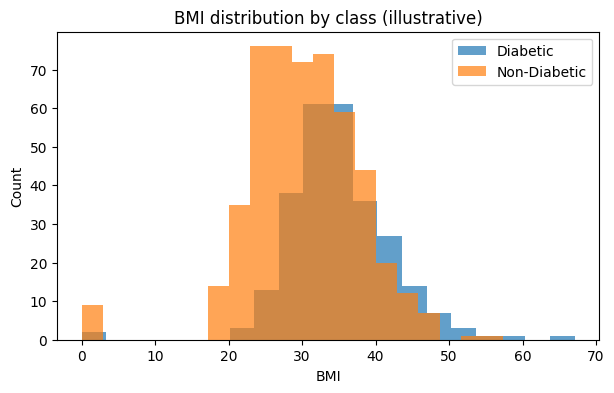

In [4]:
# Expand small preview into a larger synthetic dataset (only used if your local CSV is not available)
if Path(diabetes_path).exists():
    df_diabetes = df_diabetes_small.copy()
else:
    df_diabetes = bootstrap_tabular(df_diabetes_small, n=400, noise_scale=0.10)

# Basic cleaning: ensure label is consistent
df_diabetes["classification"] = df_diabetes["classification"].astype(str).str.strip()

# Split BMI by class (robust parsing)
cls = df_diabetes["classification"].astype(str).str.lower()
mask_non = cls.str.contains("non")
mask_diab = cls.str.contains("diab") & ~mask_non

bmi_diab = df_diabetes.loc[mask_diab, "BMI"].astype(float)
bmi_nond = df_diabetes.loc[mask_non, "BMI"].astype(float)

print("Counts:", {"Diabetic": len(bmi_diab), "Non-Diabetic": len(bmi_nond)})
print("Mean BMI:", {"Diabetic": float(bmi_diab.mean()), "Non-Diabetic": float(bmi_nond.mean())})

# Welch's t-test (does not assume equal variances)
t_stat, p_val = stats.ttest_ind(bmi_diab, bmi_nond, equal_var=False)

# Difference in means and a simple CI via standard error (Welch approximation)
diff = float(bmi_diab.mean() - bmi_nond.mean())
se = float(np.sqrt(bmi_diab.var(ddof=1)/len(bmi_diab) + bmi_nond.var(ddof=1)/len(bmi_nond)))
df_welch = float((bmi_diab.var(ddof=1)/len(bmi_diab) + bmi_nond.var(ddof=1)/len(bmi_nond))**2 /
                 ((bmi_diab.var(ddof=1)/len(bmi_diab))**2/(len(bmi_diab)-1) + (bmi_nond.var(ddof=1)/len(bmi_nond))**2/(len(bmi_nond)-1)))
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df=df_welch)
ci_low, ci_high = diff - t_crit*se, diff + t_crit*se

print(f"Welch t-test: t = {t_stat:.3f}, p = {p_val:.4g}")
print(f"Estimated mean difference (Diabetic - Non): {diff:.3f}")
print(f"95% CI for difference: [{ci_low:.3f}, {ci_high:.3f}]")

# Visual check: histograms (distribution comparison)
plt.figure(figsize=(7,4))
plt.hist(bmi_diab, bins=20, alpha=0.7, label="Diabetic")
plt.hist(bmi_nond, bins=20, alpha=0.7, label="Non-Diabetic")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("BMI distribution by class (illustrative)")
plt.legend()
plt.show()

### تفسیر (ذهنیت آماری)

- **برآورد نقطه‌ای** جهت و اندازهٔ اختلاف را نشان می‌دهد.  
- **فاصلهٔ اطمینان** عدم‌قطعیت را منتقل می‌کند: مقادیر داخل بازه، تحت مدل، «محتمل» هستند.  
- **p-value** به یک سؤال محدود پاسخ می‌دهد: «اگر فرض صفر درست باشد، مشاهدهٔ اختلاف (یا بزرگ‌تر) چقدر شگفت‌آور است؟»  
  p-value **احتمال درست بودن فرض صفر** نیست و **اهمیت عملی** را تضمین نمی‌کند.

یک ترجمهٔ رایج برای کسب‌وکار:

> «با توجه به این داده‌ها و مفروضات، میانگین BMI در گروه دیابتی متفاوت به نظر می‌رسد و بازهٔ عدم‌قطعیت ما تقریباً $[L, U]$ واحد BMI است.»

اما استنباط می‌تواند شکننده باشد اگر:
- نمونه‌گیری سوگیرانه باشد،
- کلاس‌ها به‌دلیل مخدوش‌گرها متفاوت باشند،
- نشت داده (Leakage) وجود داشته باشد،
- آزمون‌های متعدد اجرا شده و فقط نتایج معنادار گزارش شده باشند.

اکنون همین داده را با ذهنیت ML مقایسه می‌کنیم: پیش‌بینی برچسب کلاس برای افراد جدید.

## ۵) مثال B — چارچوب ML: پیش‌بینی و تعمیم

در ML سؤال مرکزی این است:

> «مدل روی *داده‌های جدید* چقدر خوب عمل می‌کند؟»

و این باعث تغییر جریان کاری می‌شود:

1. تعریف مسئلهٔ پیش‌بینی (طبقه‌بندی یا رگرسیون)  
2. ساخت تقسیم Train/Validation/Test (یا Cross-Validation)  
3. آموزش مدل و تنظیم انتخاب‌هایی که تعمیم را تحت‌تأثیر می‌گذارند (منظم‌سازی، پیش‌پردازش)  
4. گزارش معیارهای عملکرد و تحلیل خطا  
5. (در تولید) پایش drift و افت عملکرد

برای اینکه ببینید ML به یک دامنه خاص محدود نیست، از دو دیتاست استفاده می‌کنیم:

- **Iris** (طبقه‌بندی): ساده و استاندارد  
- **Diabetes** (طبقه‌بندی): یک نمونهٔ نزدیک‌تر به داده‌های جدولی واقعی

یک پایپ‌لاین مینیمال می‌سازیم و آن را درست ارزیابی می‌کنیم.

In [5]:
from sklearn.datasets import load_iris

iris_path = "../../../Datasets/Classification/iris.csv"

# Try to read from repo, otherwise use sklearn's built-in iris
try:
    if Path(iris_path).exists():
        df_iris = pd.read_csv(iris_path)
        X_iris = df_iris.drop(columns=["classification"])
        y_iris = df_iris["classification"]
    else:
        iris = load_iris(as_frame=True)
        X_iris = iris.data
        y_iris = pd.Series(iris.target).map({i: name for i, name in enumerate(iris.target_names)})
        df_iris = pd.concat([X_iris, y_iris.rename("classification")], axis=1)
except Exception as e:
    raise RuntimeError(f"Failed to load iris dataset: {e}")

display(df_iris.head())

# A simple, standard ML pipeline: scaling + logistic regression
iris_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=200, random_state=RANDOM_SEED))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
scores = cross_val_score(iris_pipeline, X_iris, y_iris, cv=cv, scoring="accuracy")

print("5-fold CV accuracy:", scores)
print("Mean ± std:", f"{scores.mean():.3f} ± {scores.std():.3f}")

,sepal_length,sepal_width,petal_length,petal_width,classification
0,5.4,3.7,1.5,0.2,Iris-setosa
1,4.8,3.4,1.6,0.2,Iris-setosa
2,4.8,3.0,1.4,0.1,Iris-setosa
3,4.3,3.0,1.1,0.1,Iris-setosa
4,5.8,4.0,1.2,0.2,Iris-setosa


5-fold CV accuracy: [1.         0.96666667 0.9        1.         0.9       ]
Mean ± std: 0.953 ± 0.045


In [6]:
# Train/test split for an error analysis snapshot
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.25, random_state=RANDOM_SEED, stratify=y_iris
)

iris_pipeline.fit(X_train_iris, y_train_iris)
y_pred = iris_pipeline.predict(X_test_iris)

acc = accuracy_score(y_test_iris, y_pred)
cm = confusion_matrix(y_test_iris, y_pred, labels=sorted(y_iris.unique()))

print("Hold-out accuracy:", f"{acc:.3f}")
print("Confusion matrix (rows=true, cols=pred):")
print(pd.DataFrame(cm, index=sorted(y_iris.unique()), columns=sorted(y_iris.unique())))

print("\nClassification report:")
print(classification_report(y_test_iris, y_pred))

Hold-out accuracy: 0.921
Confusion matrix (rows=true, cols=pred):
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               12                0               0
Iris-versicolor            0               12               1
Iris-virginica             0                2              11

Classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.86      0.92      0.89        13
 Iris-virginica       0.92      0.85      0.88        13

       accuracy                           0.92        38
      macro avg       0.92      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38



Hold-out accuracy: 0.734
ROC AUC: 0.832
Confusion matrix:
 [[106  19]
 [ 32  35]]


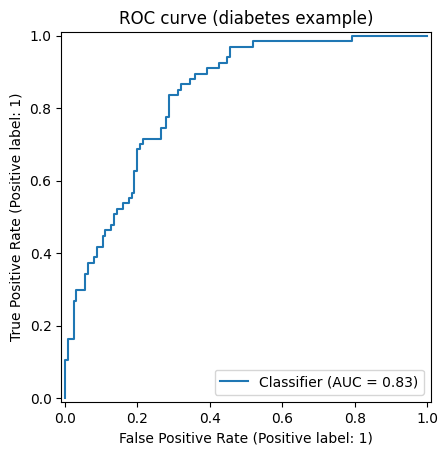

In [7]:
# ML framing on the diabetes dataset: predict the label from features
df_d = df_diabetes.copy()

# Basic preprocessing
cls = df_d["classification"].astype(str).str.lower()
# Treat "non-..." as 0, "diab..." as 1

y = cls.apply(lambda s: 0 if "non" in s else (1 if "diab" in s else np.nan)).astype(int)
X = df_d.drop(columns=["classification"])

# Split
X_train_diab, X_test_diab, y_train_diab, y_test_diab = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_SEED, stratify=y
)

diabetes_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=500, random_state=RANDOM_SEED))
])

diabetes_pipeline.fit(X_train_diab, y_train_diab)

y_pred_diab = diabetes_pipeline.predict(X_test_diab)
y_proba_diab = diabetes_pipeline.predict_proba(X_test_diab)[:, 1]

print("Hold-out accuracy:", f"{accuracy_score(y_test_diab, y_pred_diab):.3f}")
print("ROC AUC:", f"{roc_auc_score(y_test_diab, y_proba_diab):.3f}")
print("Confusion matrix:\n", confusion_matrix(y_test_diab, y_pred_diab))

RocCurveDisplay.from_predictions(y_test_diab, y_proba_diab)
plt.title("ROC curve (diabetes example)")
plt.show()

## ۵.۵) عدم‌قطعیت و «اطمینان» در عملکرد ML

آمار به شما یاد می‌دهد بپرسید: «این برآورد چقدر نامطمئن است؟»  
در ML، خودِ معیارهای عملکرد (Accuracy، AUC، RMSE) نیز **متغیر تصادفی** هستند، چون به موارد زیر وابسته‌اند:

- این‌که کدام نمونه‌ها در test قرار گرفته‌اند،
- تصادفی‌بودن آموزش (初始化، بوت‌استرپ، ...),
- فرایند تولید داده که برای ما ناشناخته است.

یک مفهوم پل‌زننده، **ریسک مورد انتظار** است:

$$
R(f) = \mathbb{E}_{(X,Y)}[\ell(f(X), Y)],
$$

که در آن $\ell$ تابع خطاست. در عمل، آن را با **ریسک تجربی** روی نمونه برآورد می‌کنیم.

### دو روش رایج برای کمّی‌سازی عدم‌قطعیت معیارهای ML
1. **نوسان Cross-Validation**: تغییرپذیری بین foldها  
2. **بوت‌استرپ روی test**: بازنمونه‌گیری با جایگذاری و محاسبهٔ دوبارهٔ معیار

این‌ها جایگزین طراحی آزمایش دقیق نیستند، اما جلوی ادعاهای بیش‌ازحد مطمئن مثل «مدل A بهتر از مدل B است» را می‌گیرند وقتی اختلاف در حد نویز است.

در ادامه، Accuracy روی تست Iris را بوت‌استرپ می‌کنیم تا یک بازهٔ تقریبی ۹۵٪ بسازیم.

Base hold-out accuracy: 0.921
Bootstrap 95% interval for accuracy: [0.816, 1.000]


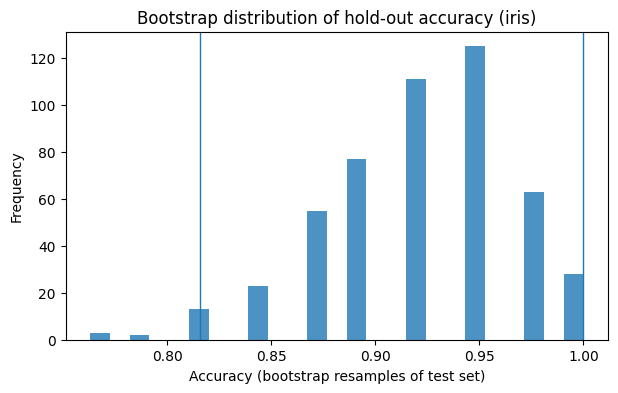

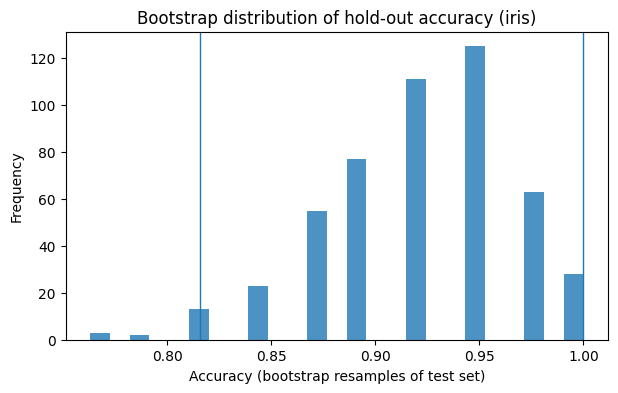

In [8]:
# Bootstrap confidence interval for hold-out accuracy (iris)
rng = np.random.default_rng(RANDOM_SEED)

# Refit on the same training set for a fixed model, then bootstrap the test set metric
iris_pipeline.fit(X_train_iris, y_train_iris)
y_pred = iris_pipeline.predict(X_test_iris)

base_acc = accuracy_score(y_test_iris, y_pred)
print("Base hold-out accuracy:", f"{base_acc:.3f}")

B = 500
acc_samples = []
idx = np.arange(len(y_test_iris))

for _ in range(B):
    b_idx = rng.choice(idx, size=len(idx), replace=True)
    acc_samples.append(accuracy_score(y_test_iris.iloc[b_idx], pd.Series(y_pred).iloc[b_idx]))

acc_samples = np.array(acc_samples)
ci = np.quantile(acc_samples, [0.025, 0.975])

print(f"Bootstrap 95% interval for accuracy: [{ci[0]:.3f}, {ci[1]:.3f}]")

plt.figure(figsize=(7,4))
plt.hist(acc_samples, bins=25, alpha=0.8)
plt.axvline(ci[0], linewidth=1)
plt.axvline(ci[1], linewidth=1)
plt.xlabel("Accuracy (bootstrap resamples of test set)")
plt.ylabel("Frequency")
plt.title("Bootstrap distribution of hold-out accuracy (iris)")
plt.show()

### چه چیزی نسبت به مثال آماری تغییر کرد؟

- در مثال **آماری** به یک کمیت قابل تفسیر (اختلاف میانگین‌ها) و عدم‌قطعیت آن اهمیت دادیم.  
- در مثال **ML** به *عملکرد خارج از نمونه* اهمیت دادیم و از:
  - تقسیم Train/Test (یا CV)،
  - معیارهای پیش‌بینی (Accuracy، AUC)،
  - منظم‌سازی و پیش‌پردازش به‌عنوان انتخاب‌های مهندسی
  استفاده کردیم.

توجه کنید که می‌توانیم ضرایب را هم نگاه کنیم، اما **در ML تفسیر ضرایب معیار اصلی موفقیت نیست**. یک ویژگی بسیار پیش‌بین می‌تواند:

- یک متغیر جانشین (Proxy) باشد،
- یک متغیر نشت‌داده (Leakage) باشد،
- یا محصول سوگیری جمع‌آوری داده باشد.

این دقیقاً یکی از رایج‌ترین نقاط سردرگمی بین ML و آمار در پروژه‌های واقعی است.

## ۶) مثال C — چارچوب داده‌کاوی: کشف الگو به‌صورت اکتشافی (خوشه‌بندی)

داده‌کاوی اغلب دربارهٔ **یافتن ساختار بدون برچسب** است.

در اینجا از دیتاست **airports** (عرض/طول جغرافیایی) استفاده می‌کنیم تا:

- فرودگاه‌ها را به چند گروه جغرافیایی تقریبی خوشه‌بندی کنیم،
- ساختار کشف‌شده را تصویر کنیم،
- دربارهٔ *پایداری* و *تفسیرپذیری* صحبت کنیم، نه «دقت».

این یک تحلیل علّی نیست و یک مسئلهٔ نظارت‌شده هم نیست. این یک روش برای خلاصه‌سازی داده و تولید فرضیه است؛ مثلاً:

- «این خوشه‌ها احتمالاً با مناطق/کریدورهای سفر مرتبط‌اند.»
- «نقاط پرت می‌تواند مشکل کیفیت داده یا مورد خاص باشد.»

عمداً جریان کاری را سبک نگه می‌داریم و روی دام‌های تفسیری تمرکز می‌کنیم.

Cluster counts:
cluster
0    39119
1    13737
2    18510
3    11759
Name: count, dtype: int64


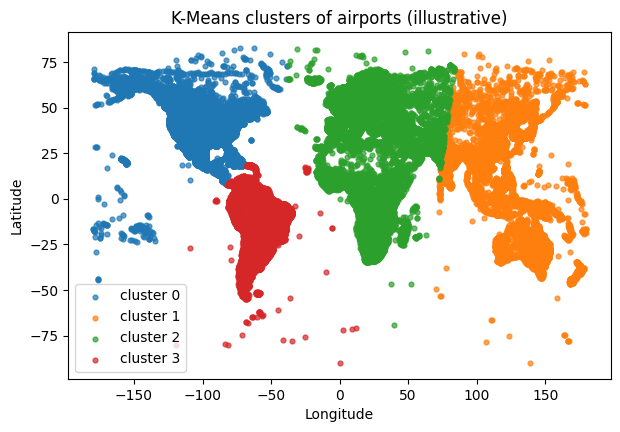

,ident,type,name,latitude_deg,longitude_deg,cluster
0,00A,heliport,Total RF Heliport,40.070985,-74.933689,0
1,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,0
2,00AK,small_airport,Lowell Field,59.947733,-151.692524,0
3,00AL,small_airport,Epps Airpark,34.864799,-86.770302,0
4,00AN,small_airport,Katmai Lodge Airport,59.093287,-156.456699,0
5,00AS,small_airport,Fulton Airport,34.942803,-97.818019,0
6,00AZ,small_airport,Cordes Airport,34.305599,-112.165001,0
7,00CA,small_airport,Goldstone (GTS) Airport,35.354740,-116.885329,0
8,00CL,small_airport,Williams Ag Airport,39.427188,-121.763427,0
9,00CN,heliport,Kitchen Creek Helibase Heliport,32.727374,-116.459742,0


In [9]:
# Prepare airport coordinates
df_air = df_airports_small.copy()

# Ensure numeric
df_air["latitude_deg"] = pd.to_numeric(df_air["latitude_deg"], errors="coerce")
df_air["longitude_deg"] = pd.to_numeric(df_air["longitude_deg"], errors="coerce")
df_air = df_air.dropna(subset=["latitude_deg", "longitude_deg"]).reset_index(drop=True)

# If the full dataset exists locally, we will use it directly; otherwise, bootstrap for a denser plot
if not Path(airports_path).exists():
    df_air = bootstrap_tabular(df_air, n=400, noise_scale=0.02)

X_geo = df_air[["latitude_deg", "longitude_deg"]].to_numpy()

k = 4
kmeans = KMeans(n_clusters=k, n_init=10, random_state=RANDOM_SEED)
clusters = kmeans.fit_predict(X_geo)
df_air["cluster"] = clusters

print("Cluster counts:")
print(df_air["cluster"].value_counts().sort_index())

# Plot clusters on a simple lon/lat scatter
plt.figure(figsize=(7,4.5))
for c in range(k):
    sub = df_air[df_air["cluster"] == c]
    plt.scatter(sub["longitude_deg"], sub["latitude_deg"], s=12, alpha=0.7, label=f"cluster {c}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("K-Means clusters of airports (illustrative)")
plt.legend()
plt.show()

display(df_air[["ident", "type", "name", "latitude_deg", "longitude_deg", "cluster"]].head(10))

### تفسیر (ذهنیت داده‌کاوی)

در خوشه‌بندی معمولاً یک جواب «کاملاً درست» وجود ندارد.

- $k$ یک *انتخاب مدل‌سازی* است که بین جزئیات و سادگی مبادله ایجاد می‌کند.  
- مقداردهی اولیه، معیار فاصله و مقیاس‌بندی می‌تواند نتیجه را تغییر دهد.  
- خوشه‌ها **حقیقت زمین** نیستند؛ یک *توصیف فشرده* از داده‌اند.

این‌که «خوب» یعنی چه به کاربرد بستگی دارد:
- اگر هدف بخش‌بندی کسب‌وکاری باشد، تفسیرپذیری و پایداری مهم‌تر است.
- اگر خوشه‌ها به‌عنوان ویژگی برای ML استفاده شوند، سودمندی پیش‌بینی مهم است.
- اگر خوشه‌ها برای هشدار ناهنجاری استفاده شوند، حساسیت/هشدار کاذب مهم است.

یک رویکرد منضبط:
1. بررسی پایداری در برابر seedهای مختلف،
2. بررسی نمونه‌های نماینده و نقاط پرت،
3. اعتبارسنجی با دانش دامنه.

در ادامه داده‌کاوی متنی را با داده‌های شکایات مصرف‌کنندگان نشان می‌دهیم.

## ۷) مثال D — داده‌کاوی با ابزارهای ML: خوشه‌بندی متن شکایات

دیتاست **ConsumerComplaints** معمولاً ستون‌های رده‌ای و گاهی یک متن آزاد (narrative) دارد. یک سؤال رایج داده‌کاوی:

> «آیا تم‌های تکرارشونده‌ای در شکایات وجود دارد که بتوانیم آن‌ها را به تیم‌های تخصصی ارجاع دهیم؟»

این کار اکتشافی است. ما ادعا نمی‌کنیم این خوشه‌ها «طبقه‌بندی واقعی» شکایات‌اند.  
هدف، ساختن یک **خلاصه‌سازی مفید** برای triage یا برچسب‌گذاری بعدی است.

مراحل:
- ساخت یک متن سبک از ستون‌های موجود،
- بردارسازی TF–IDF،
- خوشه‌بندی با k-means،
- بررسی واژه‌های شاخص هر خوشه.

وقتی داخل ریپو اجرا کنید، فایل از این مسیر خوانده می‌شود: `../../../Datasets/Clustering/ConsumerComplaints.csv`.

In [10]:
df_c = df_complaints_small.copy()

# Create a pseudo-text field. In the full dataset, you'd typically use the narrative;
# here we combine multiple columns to make the demo runnable.
text_cols = ["Product Name", "Sub Product", "Issue", "Sub Issue", "Company"]
for c in text_cols:
    if c not in df_c.columns:
        df_c[c] = ""

df_c["text"] = (
    df_c["Product Name"].fillna("").astype(str) + " | " +
    df_c["Sub Product"].fillna("").astype(str) + " | " +
    df_c["Issue"].fillna("").astype(str) + " | " +
    df_c["Sub Issue"].fillna("").astype(str) + " | " +
    df_c["Company"].fillna("").astype(str)
)

# If only a few rows exist (fallback mode), bootstrap to make clustering meaningful
if not Path(complaints_path).exists():
    df_c = bootstrap_tabular(df_c, n=250, noise_scale=0.00)  # no noise for text-like columns

vectorizer = TfidfVectorizer(stop_words="english", min_df=2)
X_tfidf = vectorizer.fit_transform(df_c["text"])

k = 3
km_text = KMeans(n_clusters=k, n_init=10, random_state=RANDOM_SEED)
labels = km_text.fit_predict(X_tfidf)
df_c["cluster"] = labels

print("Cluster counts:")
print(df_c["cluster"].value_counts().sort_index())

# Inspect top terms per cluster
terms = np.array(vectorizer.get_feature_names_out())
centroids = km_text.cluster_centers_
topn = 8

for c in range(k):
    top_idx = np.argsort(centroids[c])[::-1][:topn]
    print(f"\nCluster {c} top terms:", ", ".join(terms[top_idx]))

display(df_c[["Product Name", "Issue", "Company", "cluster", "text"]].head(10))

Cluster counts:
cluster
0    35292
1    11634
2    18573
Name: count, dtype: int64

Cluster 0 top terms: debt, card, account, bank, credit, collection, service, loan

Cluster 1 top terms: credit, information, reporting, report, incorrect, status, experian, equifax

Cluster 2 top terms: mortgage, loan, foreclosure, modification, conventional, servicing, escrow, fixed


,Product Name,Issue,Company,cluster,text
0,Consumer Loan,Managing the loan or lease,Wells Fargo & Company,0,Consumer Loan | Vehicle loan | Managing the lo...
1,Bank account or service,Using a debit or ATM card,Wells Fargo & Company,0,Bank account or service | Checking account | U...
2,Bank account or service,"Account opening, closing, or management",Santander Bank US,0,Bank account or service | Checking account | A...
3,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,0,Bank account or service | Checking account | D...
4,Mortgage,"Loan servicing, payments, escrow account",Franklin Credit Management,2,Mortgage | Conventional fixed mortgage | Loan ...
5,Bank account or service,Deposits and withdrawals,Bank of America,0,Bank account or service | Checking account | D...
6,Debt collection,Cont'd attempts collect debt not owed,"NRA Group, LLC",0,"Debt collection | Other (i.e. phone, health cl..."
7,Debt collection,Cont'd attempts collect debt not owed,"SunTrust Banks, Inc.",0,Debt collection | I do not know | Cont'd attem...
8,Credit card,Billing statement,Citibank,0,Credit card | | Billing statement | | Citibank
9,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,2,"Mortgage | Other mortgage | Loan servicing, pa..."


## ۸) مثال E — «یک مدل، دو چارچوب»: رگرسیون روی diamonds

مدل‌های خطی در محل تلاقی آمار و ML قرار دارند.

با دیتاست **diamonds** یک مدل رگرسیونی می‌سازیم تا قیمت را پیش‌بینی کند.  
این مثال دو ذهنیت را روشن می‌کند:

- **چارچوب ML:** انتخاب پیش‌پردازش + منظم‌سازی برای بهبود تعمیم؛ ارزیابی با RMSE و $R^2$ روی دادهٔ کنارگذاشته‌شده.
- **چارچوب آماری:** تفسیر ضرایب به‌عنوان ارتباط (association) تحت مفروضات؛ بحث دربارهٔ عدم‌قطعیت و مخدوش‌گرها (که اینجا کامل انجام نمی‌دهیم).

ما ارزیابی را در چارچوب ML انجام می‌دهیم و سپس توضیح می‌دهیم برای ادعای استنباطی چه چیزهایی لازم است.

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Hold-out RMSE: 1121.30
Hold-out R^2:  0.920


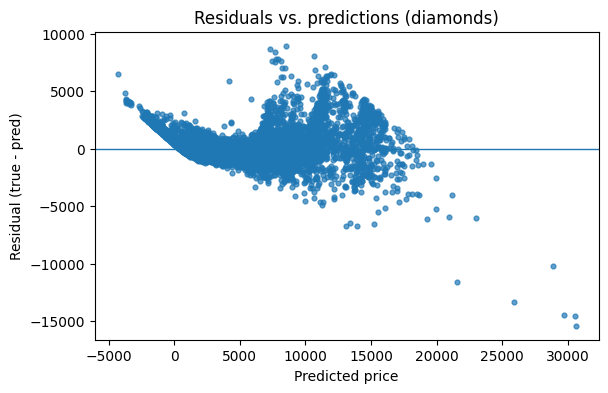

In [11]:
df_dia = df_diamonds_small.copy()

# If we're in fallback mode (few rows), bootstrap more data and add some variability to price
if not Path(diamonds_path).exists():
    df_dia = bootstrap_tabular(df_dia, n=600, noise_scale=0.05)
    # make price somewhat dependent on carat and cut (toy relationship)
    cut_bonus = df_dia["cut"].map({"Ideal": 120, "Premium": 80, "Very Good": 60, "Good": 40, "Fair": 0}).fillna(30)
    df_dia["price"] = (1200*df_dia["carat"] + 25*df_dia["table"] + 15*df_dia["depth"] + cut_bonus +
                       np.random.normal(0, 50, size=len(df_dia))).round(0)

display(df_dia.head())

target = "price"
y = pd.to_numeric(df_dia[target], errors="coerce")
X = df_dia.drop(columns=[target])

# Split columns by type
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ],
    remainder="drop",
)

model = Ridge(alpha=1.0, random_state=RANDOM_SEED)

pipe = Pipeline([
    ("prep", preprocess),
    ("model", model)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_SEED
)

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)

rmse = root_mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"Hold-out RMSE: {rmse:.2f}")
print(f"Hold-out R^2:  {r2:.3f}")

# Residual plot (diagnostic + intuition)
resid = y_test - pred
plt.figure(figsize=(6.5,4))
plt.scatter(pred, resid, s=12, alpha=0.7)
plt.axhline(0, linewidth=1)
plt.xlabel("Predicted price")
plt.ylabel("Residual (true - pred)")
plt.title("Residuals vs. predictions (diamonds)")
plt.show()

### برای یک ادعای استنباطیِ آماری چه چیزهایی تغییر می‌کند؟

اگر بخواهید ادعایی از جنس زیر داشته باشید:

> «افزایش ۰.۱ در carat باعث افزایش مورد انتظار $X$ دلار در قیمت می‌شود»

به چیزی بیشتر از یک $R^2$ خوب نیاز دارید:

- تعریف دقیق کمیت علّی و راهبرد شناسایی،
- کنترل مخدوش‌گرها (یا تصادفی‌سازی/آزمایش طبیعی),
- مفروضات اندازه‌گیری و کیفیت داده،
- کمّی‌سازی عدم‌قطعیت اثر علّی،
- تحلیل حساسیت.

در ML، رابطهٔ پیش‌بینی‌گر قوی اغلب کافی است. در آمار (و استنباط علّی)، **مفروضات خودِ محصول هستند**.

## ۹) مثال F — چارچوب AI: از پیش‌بینی تا تصمیم (هزینه‌ها و سیاست)

یک خطای رایج این است که بعد از ساخت مدل پیش‌بینی متوقف شویم.

در بسیاری از کاربردها هدف واقعی «بیشینه‌کردن AUC» نیست؛ بلکه چیزی شبیه این است:

- کمینه‌کردن هزینهٔ مورد انتظار،
- بیشینه‌کردن مطلوبیت،
- رعایت قیود ایمنی،
- تخصیص منابع محدود.

اینجاست که چارچوب AI/تصمیم‌گیری صریح می‌شود.

### یک سیاست ساده مبتنی بر هزینه

فرض کنید طبقه‌بند دیابت احتمال $\hat{p}(y=1\mid x)$ را خروجی می‌دهد و ما باید اقدام کنیم:

- $a=1$: ارجاع به غربالگری/برنامهٔ اضافی
- $a=0$: عدم اقدام

ماتریس هزینه:

| حالت واقعی / اقدام | $a=0$ (عدم اقدام) | $a=1$ (غربالگری) |
|---|---:|---:|
| $y=0$ (غیردیابتی) | $0$ | $C_{FP}$ |
| $y=1$ (دیابتی) | $C_{FN}$ | $C_{TP}$ |

معمولاً $C_{FN} \gg C_{FP}$ چون از دست دادن مورد واقعی پرهزینه است.

سیاست آستانه‌ای:

$$
\pi_\tau(x) = \mathbb{1}[\hat{p}(y=1\mid x) \ge \tau].
$$

آستانه $\tau$ را با کمینه‌کردن هزینهٔ تجربی روی یک مجموعهٔ اعتبارسنجی انتخاب می‌کنیم.

Best threshold (min cost): 0.12
Min expected cost: 0.766 per person


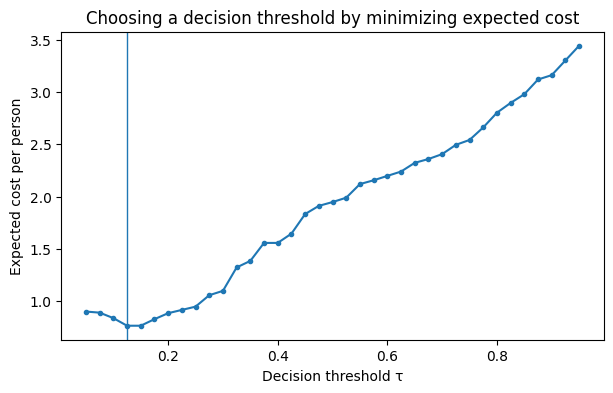

In [12]:
# Use the already-trained diabetes_pipeline probabilities on the test set
# (If you re-ran above cells, y_test and y_proba_diab correspond to the diabetes example.)

# Define costs (toy numbers)
C_FP = 1.0   # cost of unnecessary screening
C_FN = 10.0  # cost of missing a true diabetic
C_TP = 1.0   # cost of screening a true diabetic (e.g., program cost)

def expected_cost(y_true, y_prob, threshold):
    y_hat = (y_prob >= threshold).astype(int)
    # action=1 means screening
    fp = np.sum((y_true == 0) & (y_hat == 1))
    fn = np.sum((y_true == 1) & (y_hat == 0))
    tp = np.sum((y_true == 1) & (y_hat == 1))
    # tn has cost 0
    cost = C_FP*fp + C_FN*fn + C_TP*tp
    return cost / len(y_true)

thresholds = np.linspace(0.05, 0.95, 37)
costs = [expected_cost(y_test_diab.values, y_proba_diab, t) for t in thresholds]
best_idx = int(np.argmin(costs))
best_t = float(thresholds[best_idx])

print(f"Best threshold (min cost): {best_t:.2f}")
print(f"Min expected cost: {costs[best_idx]:.3f} per person")

plt.figure(figsize=(7,4))
plt.plot(thresholds, costs, marker="o", markersize=3)
plt.axvline(best_t, linewidth=1)
plt.xlabel("Decision threshold τ")
plt.ylabel("Expected cost per person")
plt.title("Choosing a decision threshold by minimizing expected cost")
plt.show()

### چرا این بخش «AI/تصمیم» است و نه «فقط ML»؟

- ML یک مدل احتمالاتی $\hat{p}(y=1\mid x)$ و معیارهایی مثل AUC به ما می‌دهد.  
- چارچوب تصمیم‌گیری مجبورمان می‌کند دقیقاً بگوییم *چه چیزی مهم است* (هزینه‌ها، قیود).  
- «بهترین» مدل می‌تواند با تغییر هزینه‌ها عوض شود. حتی اگر AUC کمی پایین‌تر باشد، ممکن است در نقطهٔ عملیاتی موردنظر هزینهٔ کمتر یا کالیبراسیون بهتر بدهد.

در سیستم‌های واقعی، این بحث گسترش پیدا می‌کند به:
- قیود ظرفیت (مثلاً فقط $K$ غربالگری در روز),
- قیود انصاف (Fairness) و الزامات قانونی,
- صف بررسی انسانی (human-in-the-loop),
- حلقه‌های بازخورد (اقدام‌ها دادهٔ آینده را تغییر می‌دهند).

این یکی از دلایل اصلی است که AI از ML گسترده‌تر است: **لایهٔ اقدام را هم شامل می‌شود.**

## ۱۰) یک مرز در عمل: پیش‌بینی در برابر تبیین (یک میکرو-دموی Leakage)

یک نمایش کوتاه از این‌که چرا «عملکرد پیش‌بینی عالی» الزاماً به معنای «سیگنال معنادار» نیست.

یک مسئلهٔ طبقه‌بندی دودویی مصنوعی می‌سازیم با:

- ویژگی‌های واقعی که فقط تا حدی پیش‌بین‌اند،
- یک **ویژگی نشت‌داده** که (به‌طور نامعتبر) از برچسب ساخته شده است.

اگر Leakage در train و test هر دو وجود داشته باشد، یک ارزیابی صرفاً ML (train/test split) می‌تواند Accuracy بسیار بالا نشان دهد. در دنیای واقعی، Leakage معمولاً وقتی رخ می‌دهد که:

- یک ویژگی *بعد از* رخداد نتیجه ثبت شده باشد (post-outcome/post-treatment),
- یک شناسه عملاً برچسب را کُد کرده باشد،
- تقسیم داده با زمان/موجودیت (entity) هم‌راستا نباشد.

ما:
1. مدل را با ویژگی Leakage آموزش می‌دهیم و عملکرد را می‌بینیم،
2. Leakage را حذف می‌کنیم و دوباره ارزیابی می‌کنیم،
3. توضیح می‌دهیم چرا چارچوب آماری/علّی دربارهٔ معنای ویژگی سؤال می‌پرسد.

این مثال ساده است، اما الگو در پروژه‌های واقعی بسیار رایج است.

In [13]:
from sklearn.datasets import make_classification

# Create moderately predictive data
X_syn, y_syn = make_classification(
    n_samples=2000,
    n_features=6,
    n_informative=3,
    n_redundant=1,
    class_sep=1.0,
    random_state=RANDOM_SEED
)

# Create a leakage feature: noisy version of the label
leakage = y_syn + np.random.normal(0, 0.05, size=len(y_syn))
X_leaky = np.column_stack([X_syn, leakage])

Xtr, Xte, ytr, yte = train_test_split(X_leaky, y_syn, test_size=0.25, random_state=RANDOM_SEED, stratify=y_syn)

clf = LogisticRegression(max_iter=200, random_state=RANDOM_SEED)
clf.fit(Xtr, ytr)

pred = clf.predict(Xte)
proba = clf.predict_proba(Xte)[:,1]

print("With leakage feature:")
print("  accuracy:", f"{accuracy_score(yte, pred):.3f}")
print("  AUC:", f"{roc_auc_score(yte, proba):.3f}")

# Remove leakage feature
Xtr2, Xte2, ytr2, yte2 = train_test_split(X_syn, y_syn, test_size=0.25, random_state=RANDOM_SEED, stratify=y_syn)
clf2 = LogisticRegression(max_iter=200, random_state=RANDOM_SEED)
clf2.fit(Xtr2, ytr2)
pred2 = clf2.predict(Xte2)
proba2 = clf2.predict_proba(Xte2)[:,1]

print("\\nWithout leakage feature:")
print("  accuracy:", f"{accuracy_score(yte2, pred2):.3f}")
print("  AUC:", f"{roc_auc_score(yte2, proba2):.3f}")

With leakage feature:
  accuracy: 1.000
  AUC: 1.000
\nWithout leakage feature:
  accuracy: 0.904
  AUC: 0.960


**جمع‌بندی:** یک معیار «عالی» می‌تواند بی‌معنا باشد اگر ویژگی‌ها پاسخ را در خود کُد کرده باشند.

راهکارهای عملی:
- در صورت نیاز، تقسیم زمانی یا بر اساس موجودیت انجام دهید،
- معنای ویژگی‌ها را برای post-outcome بودن ممیزی کنید،
- در EDA به دنبال نشانه‌های leakage باشید (فصل‌های بعد),
- از متخصص دامنه برای اعتبارسنجی معناشناسی ویژگی‌ها کمک بگیرید.

این‌جا دقیقاً اهمیت مرزبندی روشن می‌شود: *معنای نتیجه* به چارچوب وابسته است.

## ۱۱) سوءبرداشت‌های رایج (و راه اجتناب)

### سوءبرداشت ۱: «اگر خوب پیش‌بینی کند، پس علّی است»
یک ویژگی پیش‌بین می‌تواند:
- جانشین علت باشد،
- Leakage باشد،
- یا مخدوش‌شده باشد.

**راه‌حل:** اگر ادعای علّی لازم دارید، طراحی استنباط علّی انجام دهید (فصل ۳۱ بعداً) و کمیت علّی را مشخص کنید.

### سوءبرداشت ۲: «p-value کوچک یعنی اثر مهم است»
معناداری آماری به معنای اهمیت عملی نیست.

**راه‌حل:** اندازه اثر و عدم‌قطعیت را گزارش کنید؛ حداقل اختلاف عملی مهم را تعریف کنید.

### سوءبرداشت ۳: «خوشه‌بندی بخش‌های واقعی را کشف کرد»
خوشه‌ها محصول انتخاب‌ها هستند: فاصله، مقیاس‌بندی، $k$ و الگوریتم.

**راه‌حل:** پایداری را بسنجید؛ با دانش دامنه تفسیر کنید؛ خوشه‌ها را فرضیه تلقی کنید.

### سوءبرداشت ۴: «بهینه‌سازی Accuracy، کسب‌وکار را بهینه می‌کند»
هزینهٔ تصمیم معمولاً به مبادله FP/FN، ظرفیت و پیامدهای پایین‌دستی وابسته است.

**راه‌حل:** پیش‌بینی را به تصمیم با هزینه/Utility تبدیل کنید؛ آستانه را تنظیم کنید؛ KPIهای سرتاسری را ارزیابی کنید.

### سوءبرداشت ۵: «AI همان ML است»
AI شامل برنامه‌ریزی، استدلال، قیود و حلقه‌های تعامل است. ML اغلب یک جزء است.

**راه‌حل:** لایهٔ مدل (پیش‌بینی) را از لایهٔ سیاست (تصمیم/اقدام) جدا کنید.

## ۱۲) چک‌لیست عملی برای انتخاب رویکرد

برای تعریف مسئله از این چک‌لیست استفاده کنید:

1. **هدف چیست؟**  
   - تبیین/عدم‌قطعیت → *آمار*  
   - پیش‌بینی روی موارد جدید → *یادگیری ماشین*  
   - کشف ساختار/خلاصه‌سازی → *داده‌کاوی*  
   - انتخاب اقدام تحت قیود → *هوش مصنوعی / سامانه‌های تصمیم*

2. **آیا ادعای علّی لازم است؟**  
   اگر بله، به عملکرد پیش‌بینی تکیه نکنید.

3. **پروتکل ارزیابی چیست؟**  
   - استنباط: عدم‌قطعیت، عیب‌یابی، حساسیت  
   - پیش‌بینی: Hold-out/CV، کالیبراسیون، استحکام  
   - کشف: پایداری، تفسیرپذیری، سودمندی  
   - تصمیم: هزینه/Utility مورد انتظار، قیود، ایمنی

4. **حالت شکست چیست؟**  
   - FP (هدررفت منابع)؟  
   - FN (از دست دادن مورد خطرناک)؟  
   - drift / حلقه‌های بازخورد؟  
   - الزامات حاکمیتی/قانونی؟

5. **قرارداد ارتباطی چیست؟**  
   آیا می‌توانید واضح بگویید خروجی‌ها چه معنی‌ای دارند و چه معنی‌ای ندارند؟

---

## ۱۳) تمرین‌ها (پیشنهادی)

1. **استنباط در برابر پیش‌بینی:**  
   با `diabetes.csv` مقایسه کنید:
   - یک t-test برای اختلاف میانگین BMI،
   - و یک مدل پیش‌بینی برای برچسب.  
   در ۳ جمله توضیح دهید چرا این‌ها دو سؤال متفاوت‌اند.

2. **پایداری خوشه‌بندی:**  
   روی `airports.csv` خوشه‌بندی را با $k \\in \\{3,4,5,6\\}$ و seedهای مختلف اجرا کنید.  
   چه چیزهایی تغییر می‌کند و چه چیزهایی پایدار است؟

3. **تحلیل تصمیم:**  
   هزینه‌ها $(C_{FP}, C_{FN})$ را تغییر دهید و بهترین آستانه را دوباره محاسبه کنید.  
   توضیح دهید اولویت‌های کسب‌وکار چگونه نقطهٔ عملیاتی را عوض می‌کنند.

4. **بازتاب (Reflection):**  
   برای یک ایدهٔ پروژه، بنویسید:
   - هدف،  
   - پروتکل ارزیابی،  
   - ریسک‌ها و قیود.

---

## نکات کلیدی

- مرزها عمدتاً **هدف + ارزیابی** هستند، نه نام الگوریتم.  
- **آمار** روی استنباط و عدم‌قطعیت تمرکز دارد.  
- **ML** روی تعمیم و عملکرد پیش‌بینی تمرکز دارد.  
- **داده‌کاوی** روی کشف و خلاصه‌سازی تمرکز دارد.  
- **AI** روی تصمیم، هزینه، قیود و تعامل تمرکز دارد.

در درس بعدی وارد *فرمول‌بندی مسئله* می‌شویم (ورودی/خروجی، هدف، قیود و هزینه‌ها).